In [234]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as px

In [197]:
df=pd.read_csv(r"C:\Users\client\Documents\Datasets\ds_salaries.csv")
df=df[:2000]
# pd.reset_option("display.max_rows")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
1995,2022,EN,FT,Data Engineer,160000,USD,160000,US,0,US,M
1996,2022,EN,FT,Data Engineer,135000,USD,135000,US,0,US,M
1997,2022,SE,FT,Data Engineer,216000,USD,216000,US,100,US,M
1998,2022,SE,FT,Data Engineer,144000,USD,144000,US,100,US,M


# Check the data if it is clean

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2000 non-null   int64 
 1   experience_level    2000 non-null   object
 2   employment_type     2000 non-null   object
 3   job_title           2000 non-null   object
 4   salary              2000 non-null   int64 
 5   salary_currency     2000 non-null   object
 6   salary_in_usd       2000 non-null   int64 
 7   employee_residence  2000 non-null   object
 8   remote_ratio        2000 non-null   int64 
 9   company_location    2000 non-null   object
 10  company_size        2000 non-null   object
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [199]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2000.000000,2.000000e+03,2000.000000,2000.000000
mean,2022.889500,1.671617e+05,146959.483500,35.775000
std,0.324565,2.238240e+05,61756.423294,47.434422
min,2020.000000,6.000000e+03,6304.000000,0.000000
25%,2023.000000,1.067250e+05,106000.000000,0.000000
50%,2023.000000,1.445000e+05,142200.000000,0.000000
75%,2023.000000,1.850000e+05,183077.500000,100.000000
max,2023.000000,5.000000e+06,423834.000000,100.000000


In [200]:
df.isnull()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False


In [201]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [202]:
df['salary_in_usd'] = df['salary_in_usd'].astype(float)
df.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                  int64
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
dtype: object

#  1-What is the distribution of job titles based on experience levels?


In [203]:
job_dist=df.groupby(["experience_level", "job_title"]).max().reset_index()
job_dist=job_dist[["experience_level",'job_title',"salary_in_usd"]].sort_values("salary_in_usd", ascending=False).reset_index().drop('index', axis=1)
top_job_dist=df.groupby(["experience_level"])["salary_in_usd"].max().reset_index()
job_dist.head(100)
top_job_dist=top_job_dist.sort_values("salary_in_usd", ascending=False)

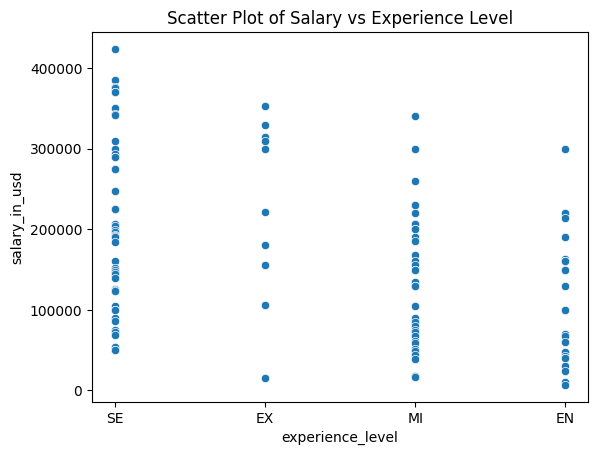

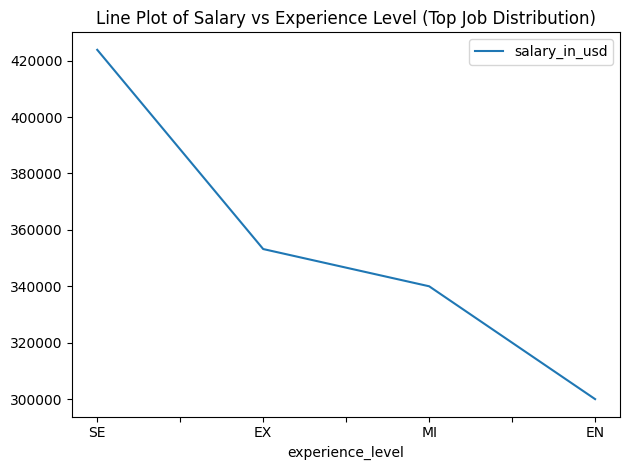

In [204]:
sns.scatterplot(x='experience_level', y='salary_in_usd', data=job_dist)
plt.title('Scatter Plot of Salary vs Experience Level')
top_job_dist.plot(x='experience_level', y='salary_in_usd', kind='line')
plt.title('Line Plot of Salary vs Experience Level (Top Job Distribution)')

plt.tight_layout()
plt.show()



# 2-Are there significant salary differences between full-time and part-time?

In [205]:
emp_type_salary=df[["employment_type","salary_in_usd"]].sort_values("salary_in_usd", ascending=False).reset_index().drop('index', axis=1)
emp_type_salary.head(100)

,employment_type,salary_in_usd
0,FT,423834.0
1,FT,385000.0
2,FT,376080.0
3,FT,375000.0
4,FT,370000.0
...,...,...
95,FT,259000.0
96,FT,258750.0
97,FT,258000.0
98,FT,258000.0


In [206]:
em=emp_type_salary.groupby(["employment_type"])["salary_in_usd"].max().reset_index()

In [207]:
salary_in_usd=[]
employment_type=[]
for i in em["employment_type"]:
    employment_type.append(i)

for i in em["salary_in_usd"]:
    salary_in_usd.append(i)

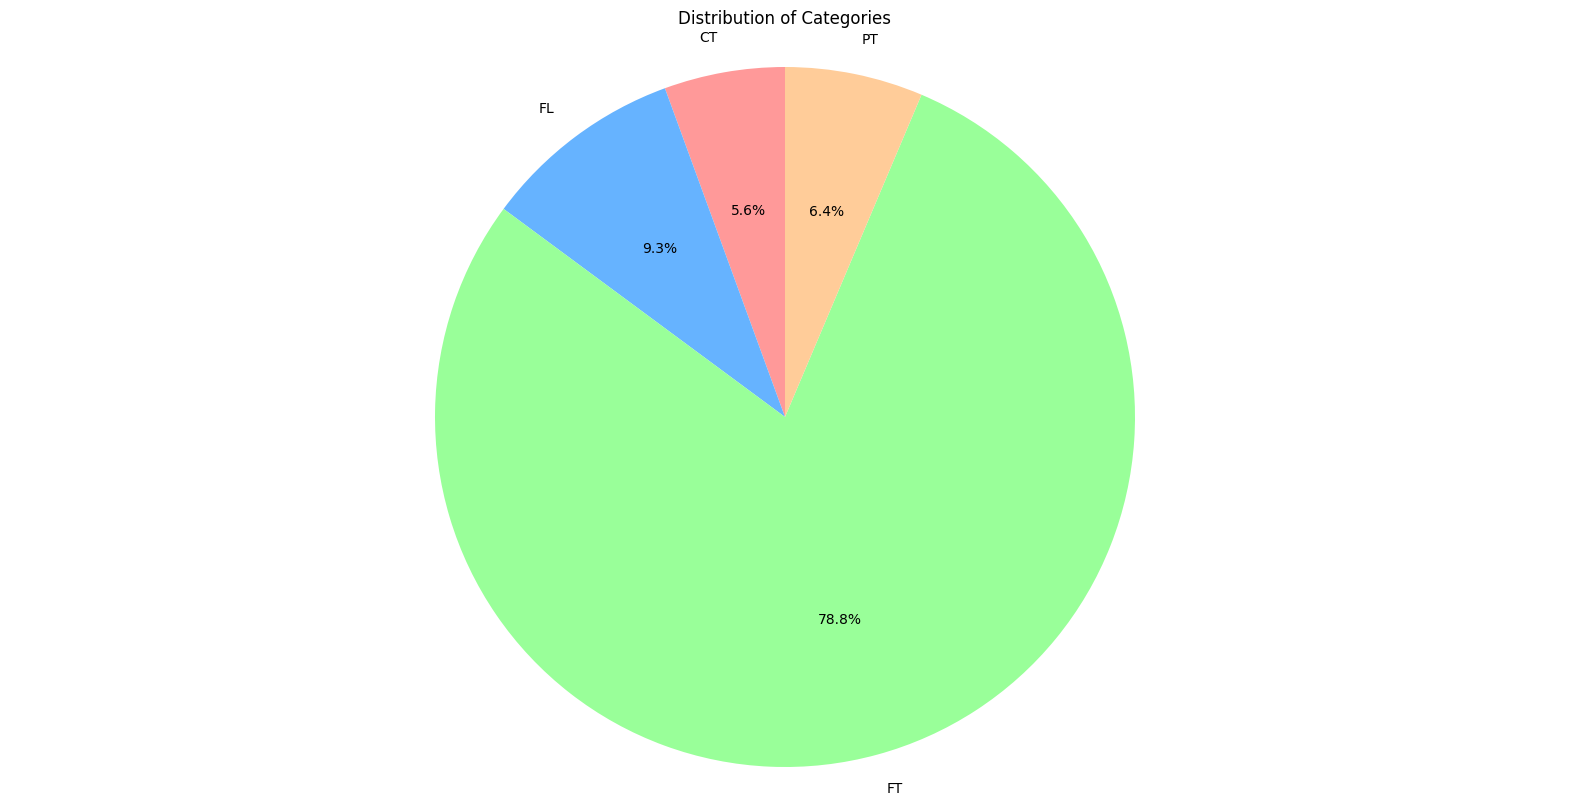

In [208]:
plt.figure(figsize=(20, 10))
plt.pie(salary_in_usd, labels=employment_type, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.axis('equal')  
plt.title('Distribution of Categories')
plt.show()

# 3-How do salaries vary when converted to USD across different country?

In [209]:
salary_convertion=df[['salary',"salary_currency","salary_in_usd"]]
salary_convertion=salary_convertion[salary_convertion['salary_currency']!='USD'].reset_index().drop('index', axis=1)
salary_convertion

,salary,salary_currency,salary_in_usd
0,80000,EUR,85847.0
1,1650000,INR,20984.0
2,510000,HKD,65062.0
3,65000,EUR,69751.0
4,90000,EUR,96578.0
...,...,...,...
166,35000,EUR,36773.0
167,2800000,INR,35610.0
168,45000,EUR,47280.0
169,36000,EUR,37824.0


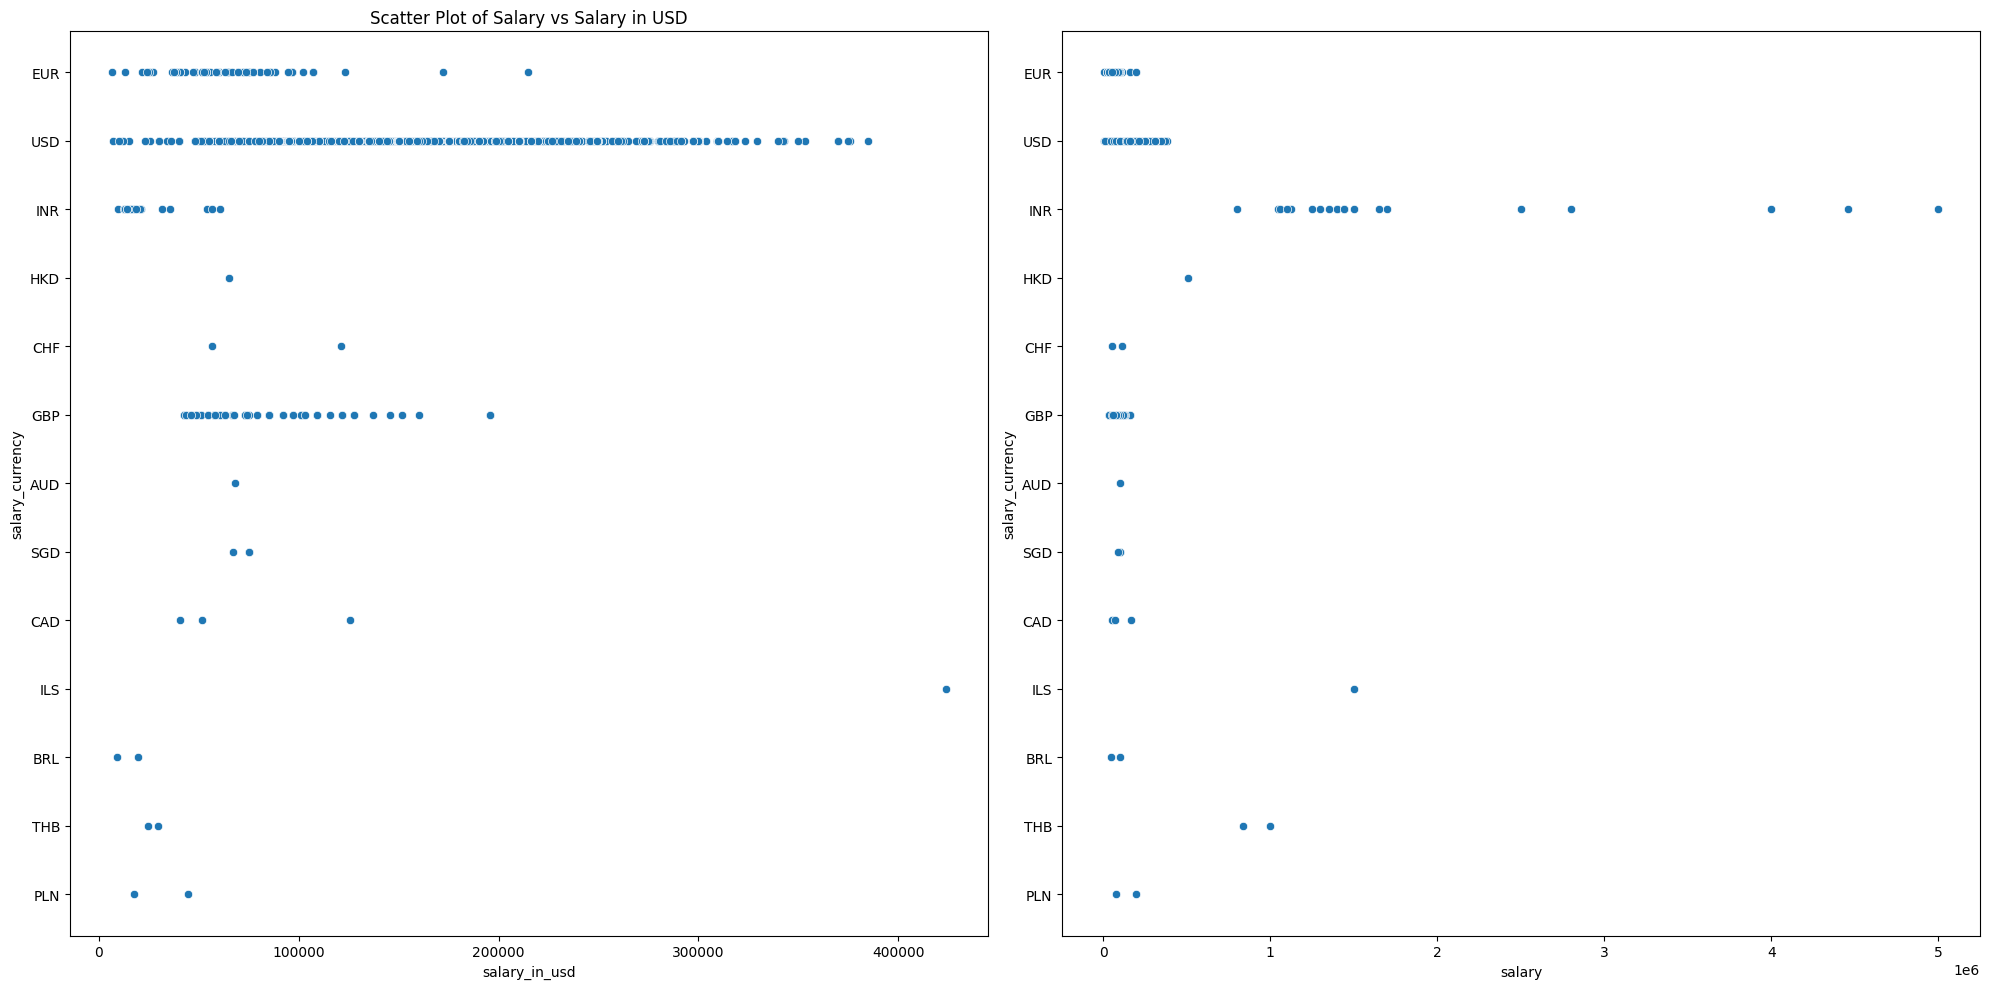

In [210]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.scatterplot(x='salary_in_usd', y='salary_currency', data=df)
plt.title('Scatter Plot of Salary vs Salary in USD')
plt.subplot(1, 2, 2)
sns.scatterplot(x='salary',y='salary_currency', data=df)
plt.tight_layout()
plt.show()


# 4-Most paid employees from each company

In [211]:
idx = df.groupby('company_location')['salary_in_usd'].idxmax()
highest_paid_employees = df.loc[idx]
highest_paid_employees=highest_paid_employees.groupby(['job_title', 'company_location'])[['salary_in_usd']].max().reset_index(0).sort_values("salary_in_usd", ascending=False)
highest_paid_employees=highest_paid_employees.reset_index()
highest_paid_employees.head(10)

,company_location,job_title,salary_in_usd
0,IL,AI Scientist,423834.0
1,US,Data Analyst,385000.0
2,IN,AI Developer,300000.0
3,DE,Research Engineer,275000.0
4,CA,AI Developer,275000.0
5,ES,Research Scientist,253750.0
6,GB,Analytics Engineer,230000.0
7,IE,Lead Data Scientist,172309.0
8,MX,Data Science Manager,150000.0
9,NL,Data Analytics Manager,133000.0


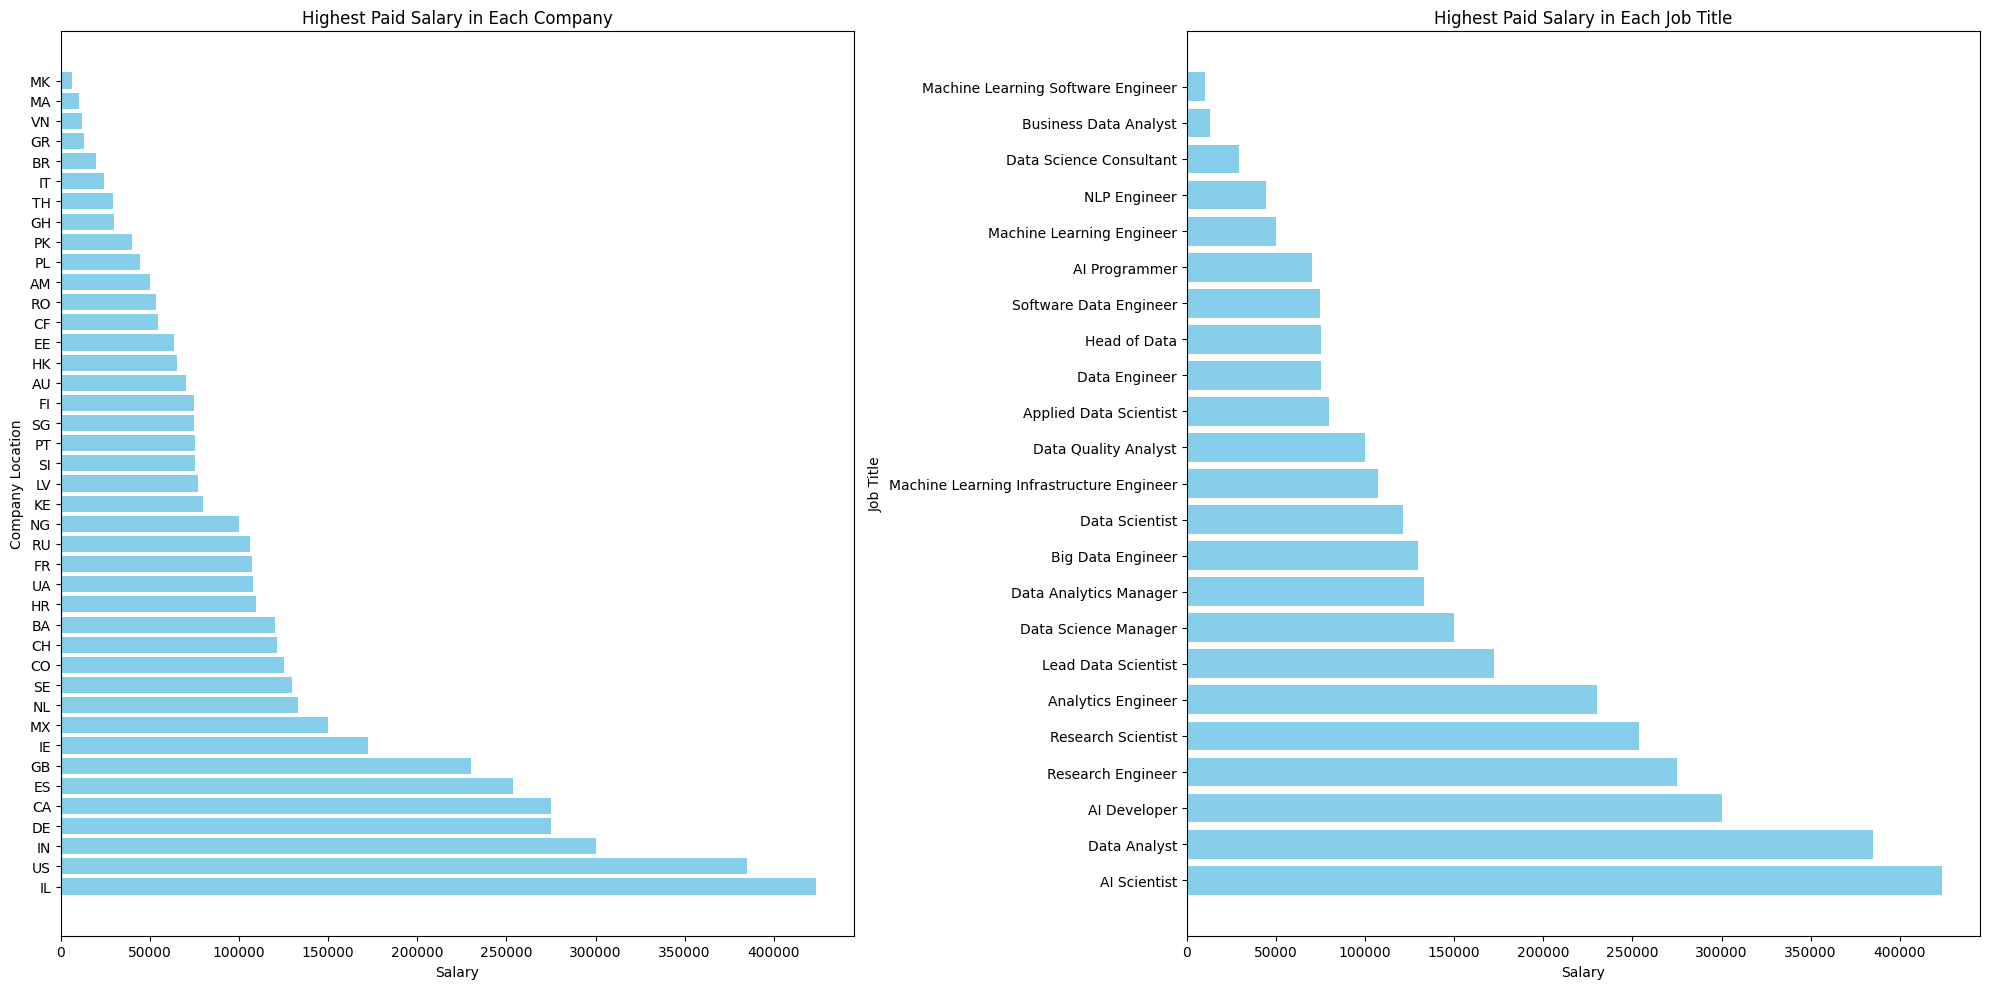

In [212]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.barh(highest_paid_employees['company_location'], highest_paid_employees['salary_in_usd'], color='skyblue')
plt.xlabel('Salary')
plt.ylabel('Company Location')
plt.title('Highest Paid Salary in Each Company')
plt.subplot(1, 2, 2)
plt.barh(highest_paid_employees['job_title'], highest_paid_employees['salary_in_usd'], color='skyblue')
plt.xlabel('Salary')
plt.ylabel('Job Title')
plt.title('Highest Paid Salary in Each Job Title')

plt.tight_layout()
plt.show()


# 5-Most Paid employees in USA

In [213]:
US_employees=df[df["company_location"]=="US"]
US_employees=US_employees.groupby(["job_title","company_location"])[["salary_in_usd"]].max()
US_employees=US_employees.sort_values("salary_in_usd", ascending=False).reset_index()
US_employees.head(10)




,job_title,company_location,salary_in_usd
0,Data Analyst,US,385000.0
1,Data Architect,US,376080.0
2,Machine Learning Software Engineer,US,375000.0
3,Research Scientist,US,370000.0
4,Data Scientist,US,370000.0
5,Director of Data Science,US,353200.0
6,Applied Scientist,US,350000.0
7,Computer Vision Engineer,US,342810.0
8,Machine Learning Engineer,US,342300.0
9,Head of Data,US,329500.0


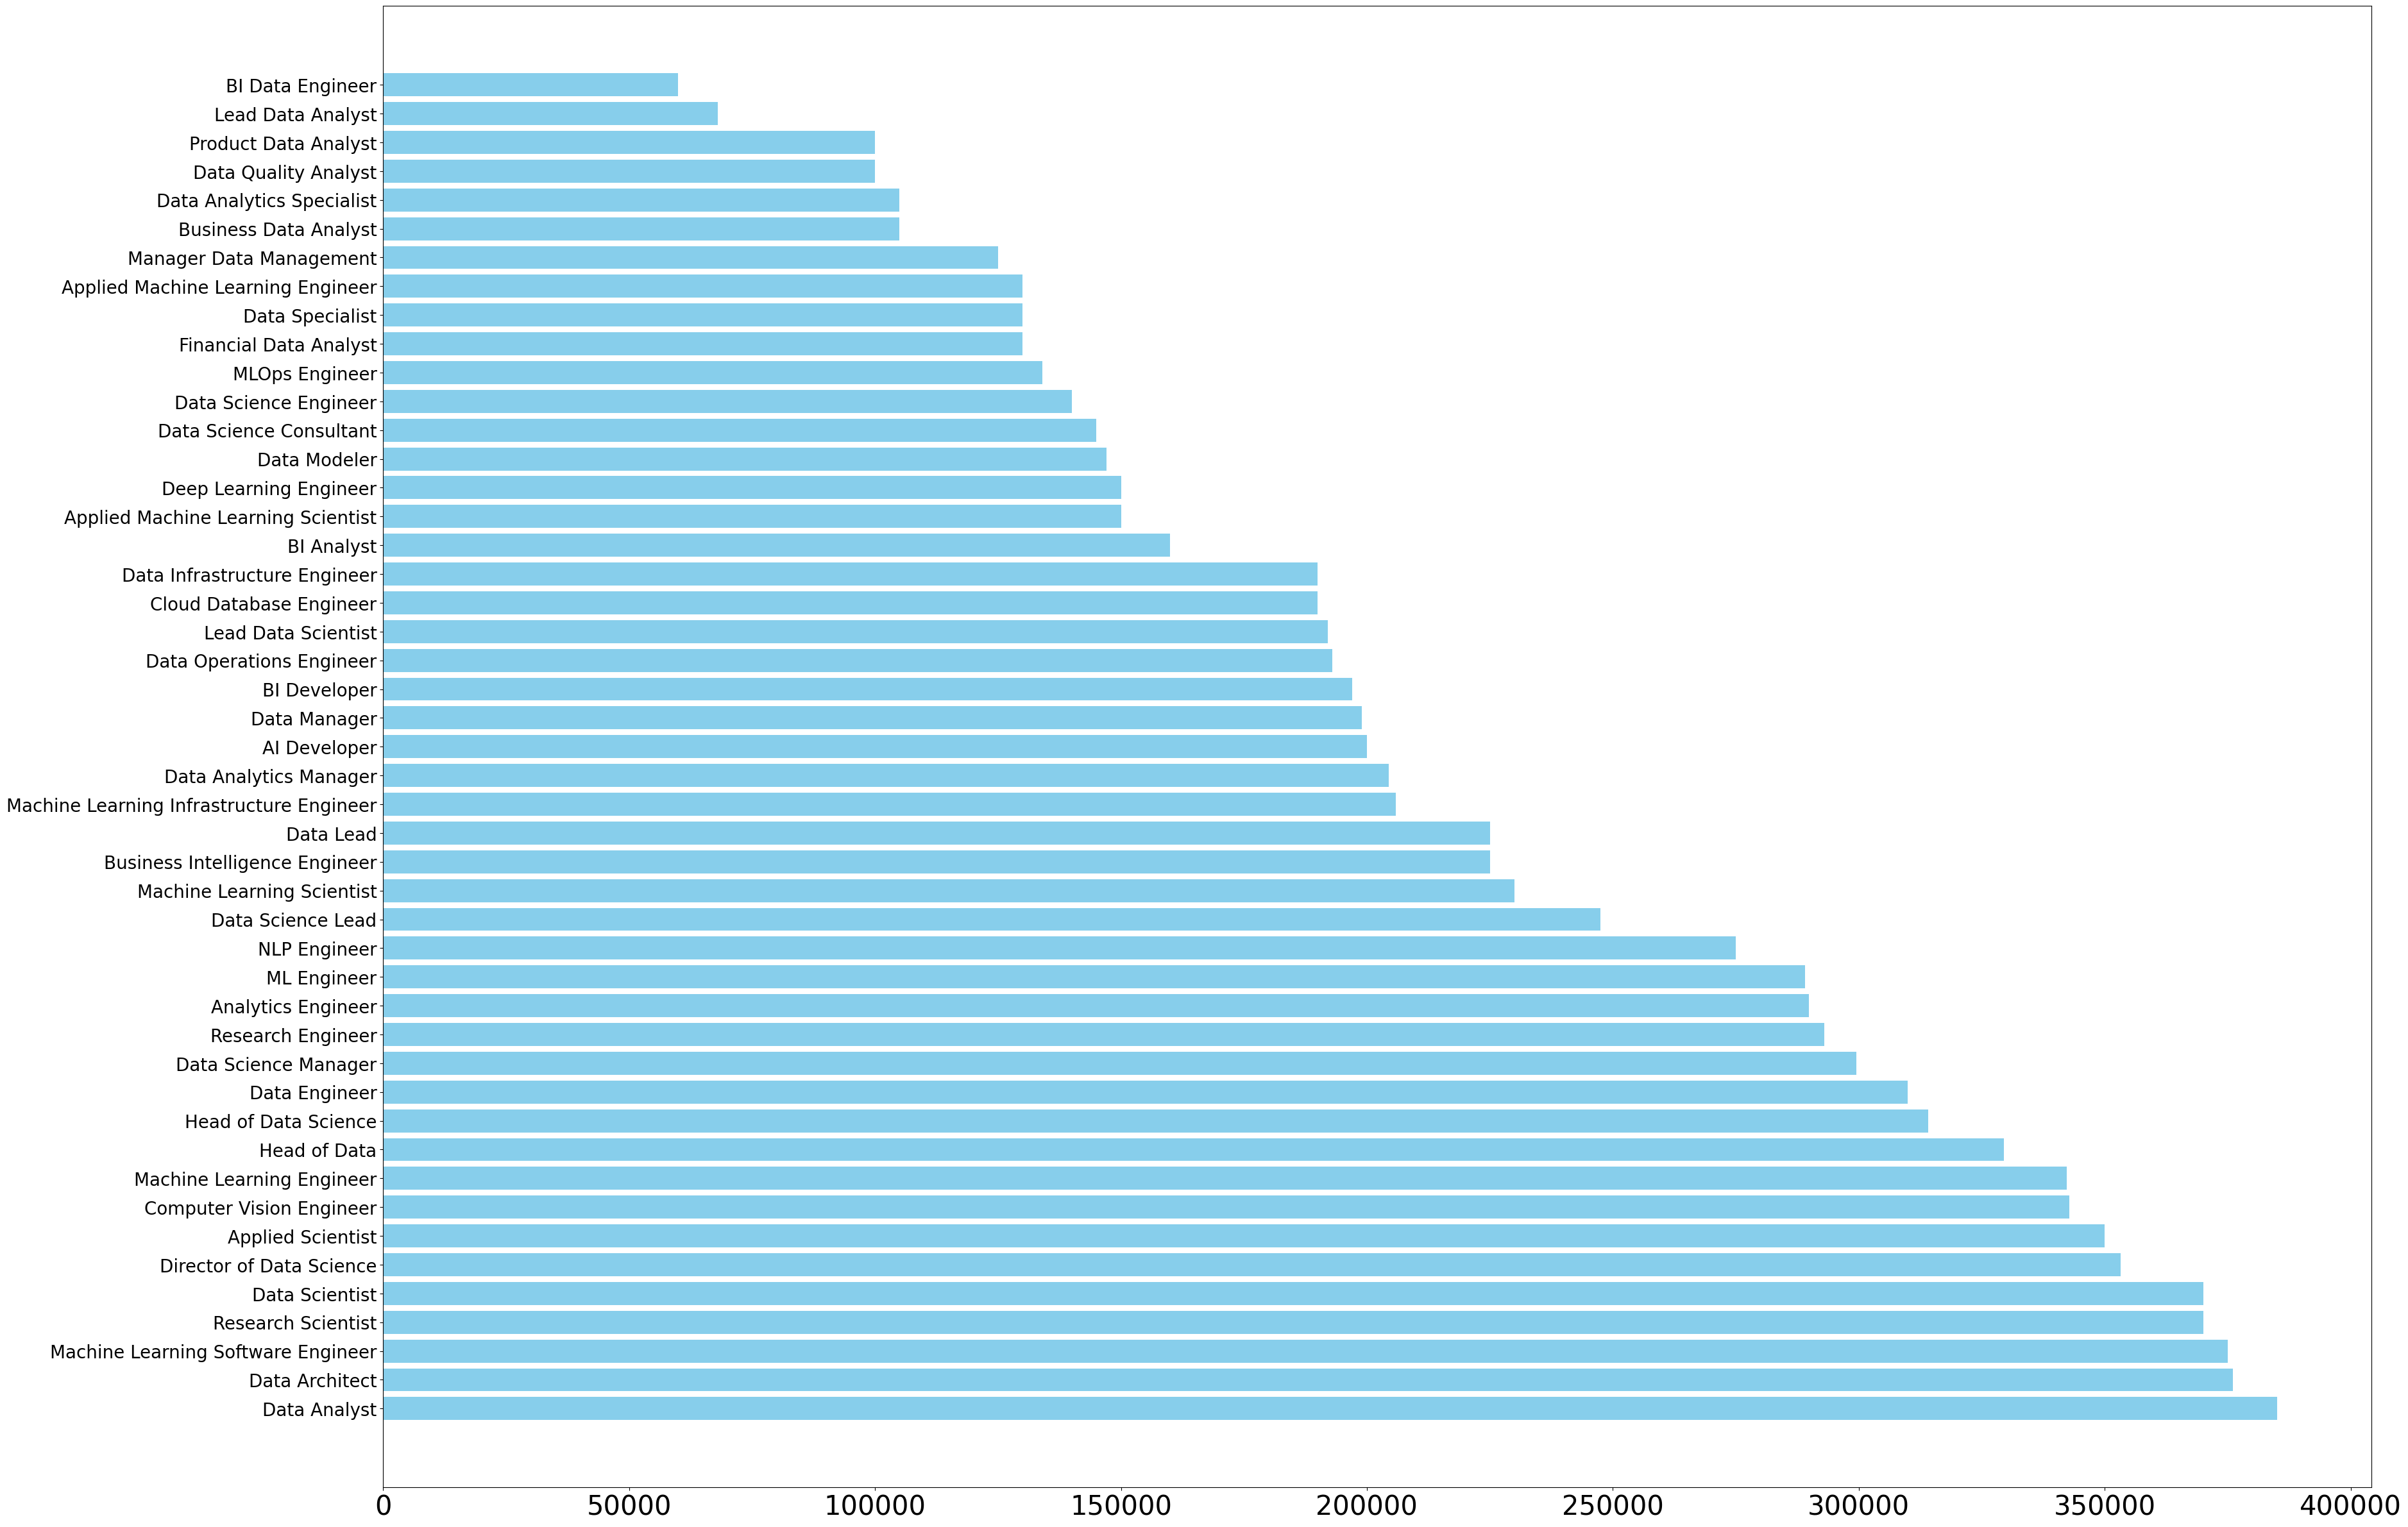

In [214]:
plt.figure(figsize=(40, 30))
plt.barh(US_employees['job_title'], US_employees['salary_in_usd'], color='skyblue')
plt.xticks(fontsize=30)
plt.yticks(fontsize=20)
plt.show()

# 6-Most Copmany To Have employees

In [215]:
res=0
employee_capacity=[]
for i in df["company_location"]:  
    res=0
    for j in df["company_location"]:
        if j==i:
            res+=1
    employee_capacity.append(res)

df["employee_capacity"]=employee_capacity
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_capacity
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847.0,ES,100,ES,L,32
1,2023,MI,CT,ML Engineer,30000,USD,30000.0,US,100,US,S,1741
2,2023,MI,CT,ML Engineer,25500,USD,25500.0,US,100,US,S,1741
3,2023,SE,FT,Data Scientist,175000,USD,175000.0,CA,100,CA,M,40
4,2023,SE,FT,Data Scientist,120000,USD,120000.0,CA,100,CA,M,40
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2022,EN,FT,Data Engineer,160000,USD,160000.0,US,0,US,M,1741
1996,2022,EN,FT,Data Engineer,135000,USD,135000.0,US,0,US,M,1741
1997,2022,SE,FT,Data Engineer,216000,USD,216000.0,US,100,US,M,1741
1998,2022,SE,FT,Data Engineer,144000,USD,144000.0,US,100,US,M,1741


In [216]:
employee_cap_in_company=df.groupby(["company_location"])["employee_capacity"].max().reset_index().sort_values("employee_capacity", ascending=False)
employee_cap_in_company=employee_cap_in_company.reset_index().drop('index',axis=1)

In [217]:
employee_cap_in_company=employee_cap_in_company.head(10)
employee_cap_in_company

,company_location,employee_capacity
0,US,1741
1,GB,71
2,CA,40
3,ES,32
4,IN,22
5,DE,15
6,FR,9
7,IE,6
8,MX,5
9,LV,4


C:\Users\client\AppData\Local\Temp\ipykernel_11196\495813784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_location', y='employee_capacity', data=employee_cap_in_company,palette=unique_colors)


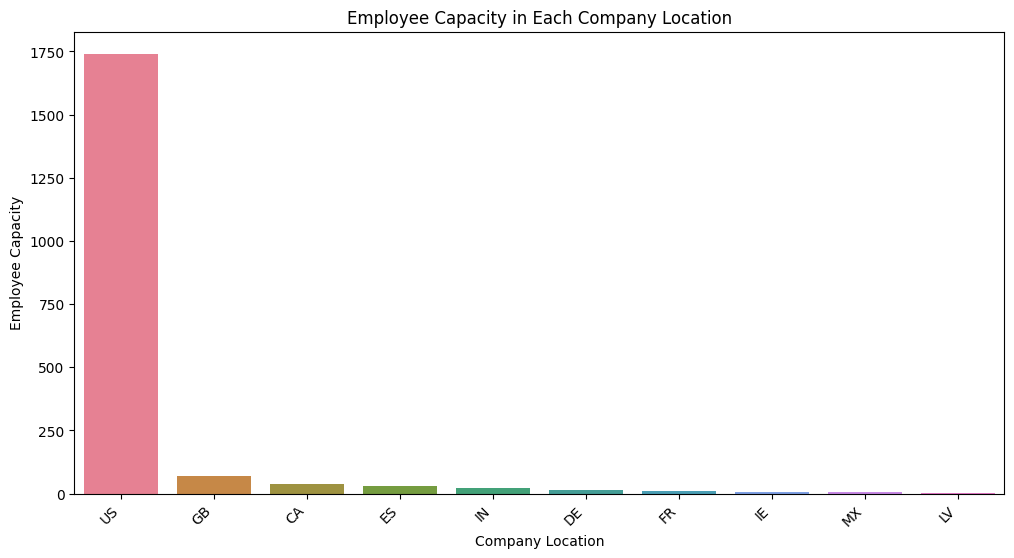

In [218]:
plt.figure(figsize=(12, 6))
unique_colors = sns.color_palette("husl", len(employee_cap_in_company['company_location'].unique()))
sns.barplot(x='company_location', y='employee_capacity', data=employee_cap_in_company,palette=unique_colors)
plt.xlabel('Company Location')
plt.ylabel('Employee Capacity')
plt.title('Employee Capacity in Each Company Location')
plt.xticks(rotation=45, ha='right') 
plt.show()

# 7-who are the first ten employees to be employed in the company

In [219]:
first_employees=df.groupby(['work_year','job_title','company_location']).max().reset_index()
first_employees=first_employees[['work_year','job_title','company_location','salary_in_usd']].head(10)
first_employees

,work_year,job_title,company_location,salary_in_usd
0,2020,Staff Data Analyst,CA,15000.0
1,2021,AI Scientist,GH,30000.0
2,2021,Data Science Lead,US,150000.0
3,2021,Data Scientist,IN,54094.0
4,2021,Marketing Data Engineer,SG,66970.0
5,2022,AI Developer,CA,275000.0
6,2022,AI Developer,IN,300000.0
7,2022,AI Developer,MK,6304.0
8,2022,AI Programmer,AU,40000.0
9,2022,AI Scientist,CO,125000.0


C:\Users\client\AppData\Local\Temp\ipykernel_11196\1876676623.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='work_year',data=first_employees,palette=unique_colors)


<Axes: xlabel='work_year', ylabel='count'>

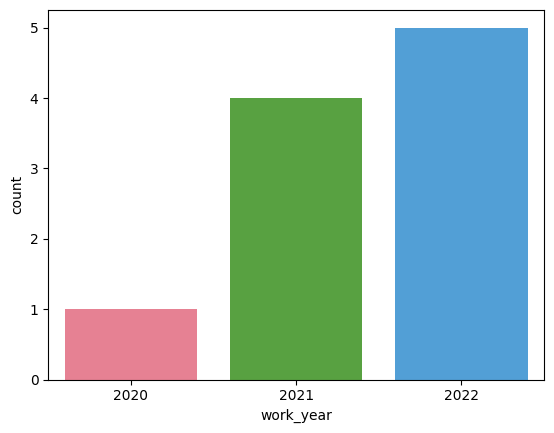

In [220]:
unique_colors = sns.color_palette("husl", len(first_employees['work_year'].unique()))
sns.countplot(x='work_year',data=first_employees,palette=unique_colors)

# 8-How much salary get paid every year


In [221]:
salary_per_year=df.groupby(['work_year'])['salary_in_usd'].sum().reset_index()
salary_per_year

,work_year,salary_in_usd
0,2020,15000.0
1,2021,301064.0
2,2022,27556612.0
3,2023,266046291.0


# A strong correlation between working years and salary

In [222]:
correlation=salary_per_year['work_year'].corr(salary_per_year['salary_in_usd'])

In [223]:
correlation

0.8258202984680777

<Axes: xlabel='work_year'>

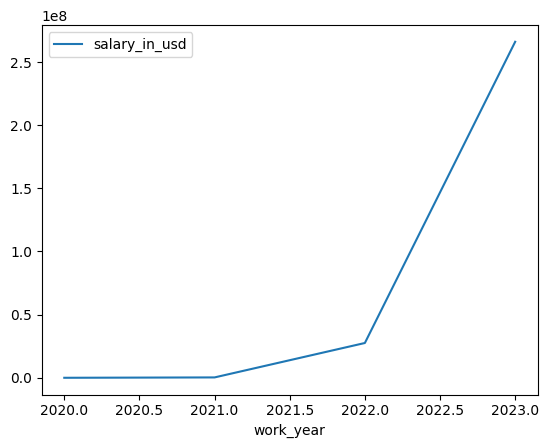

In [224]:
salary_per_year.plot(x='work_year',y='salary_in_usd')

# 9-top 10 job titles in companies

In [225]:
res=0
employee_capacity=[]
for i in df["job_title"]:  
    res=0
    for j in df["job_title"]:
        if j==i:
            res+=1
    employee_capacity.append(res)

df["job_capacity"]=employee_capacity
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_capacity,job_capacity
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847.0,ES,100,ES,L,32,1
1,2023,MI,CT,ML Engineer,30000,USD,30000.0,US,100,US,S,1741,16
2,2023,MI,CT,ML Engineer,25500,USD,25500.0,US,100,US,S,1741,16
3,2023,SE,FT,Data Scientist,175000,USD,175000.0,CA,100,CA,M,40,419
4,2023,SE,FT,Data Scientist,120000,USD,120000.0,CA,100,CA,M,40,419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2022,EN,FT,Data Engineer,160000,USD,160000.0,US,0,US,M,1741,571
1996,2022,EN,FT,Data Engineer,135000,USD,135000.0,US,0,US,M,1741,571
1997,2022,SE,FT,Data Engineer,216000,USD,216000.0,US,100,US,M,1741,571
1998,2022,SE,FT,Data Engineer,144000,USD,144000.0,US,100,US,M,1741,571


In [226]:
jobs_capacity=df.groupby(["job_capacity"])[["job_title"]].max().reset_index()
jobs_capacity=jobs_capacity[["job_title","job_capacity"]]
jobs_capacity=jobs_capacity.sort_values(by='job_capacity', ascending=False).reset_index().drop("index", axis =1)
jobs_capacity=jobs_capacity.head(10)
jobs_capacity

,job_title,job_capacity
0,Data Engineer,571
1,Data Scientist,419
2,Data Analyst,332
3,Machine Learning Engineer,173
4,Research Scientist,60
5,Data Architect,52
6,Analytics Engineer,48
7,Applied Scientist,44
8,Research Engineer,34
9,Data Science Manager,25


In [227]:
job_title=[]
job_capacity=[]
for i in jobs_capacity["job_title"]:
    job_title.append(i)

for i in jobs_capacity["job_capacity"]:
    job_capacity.append(i)

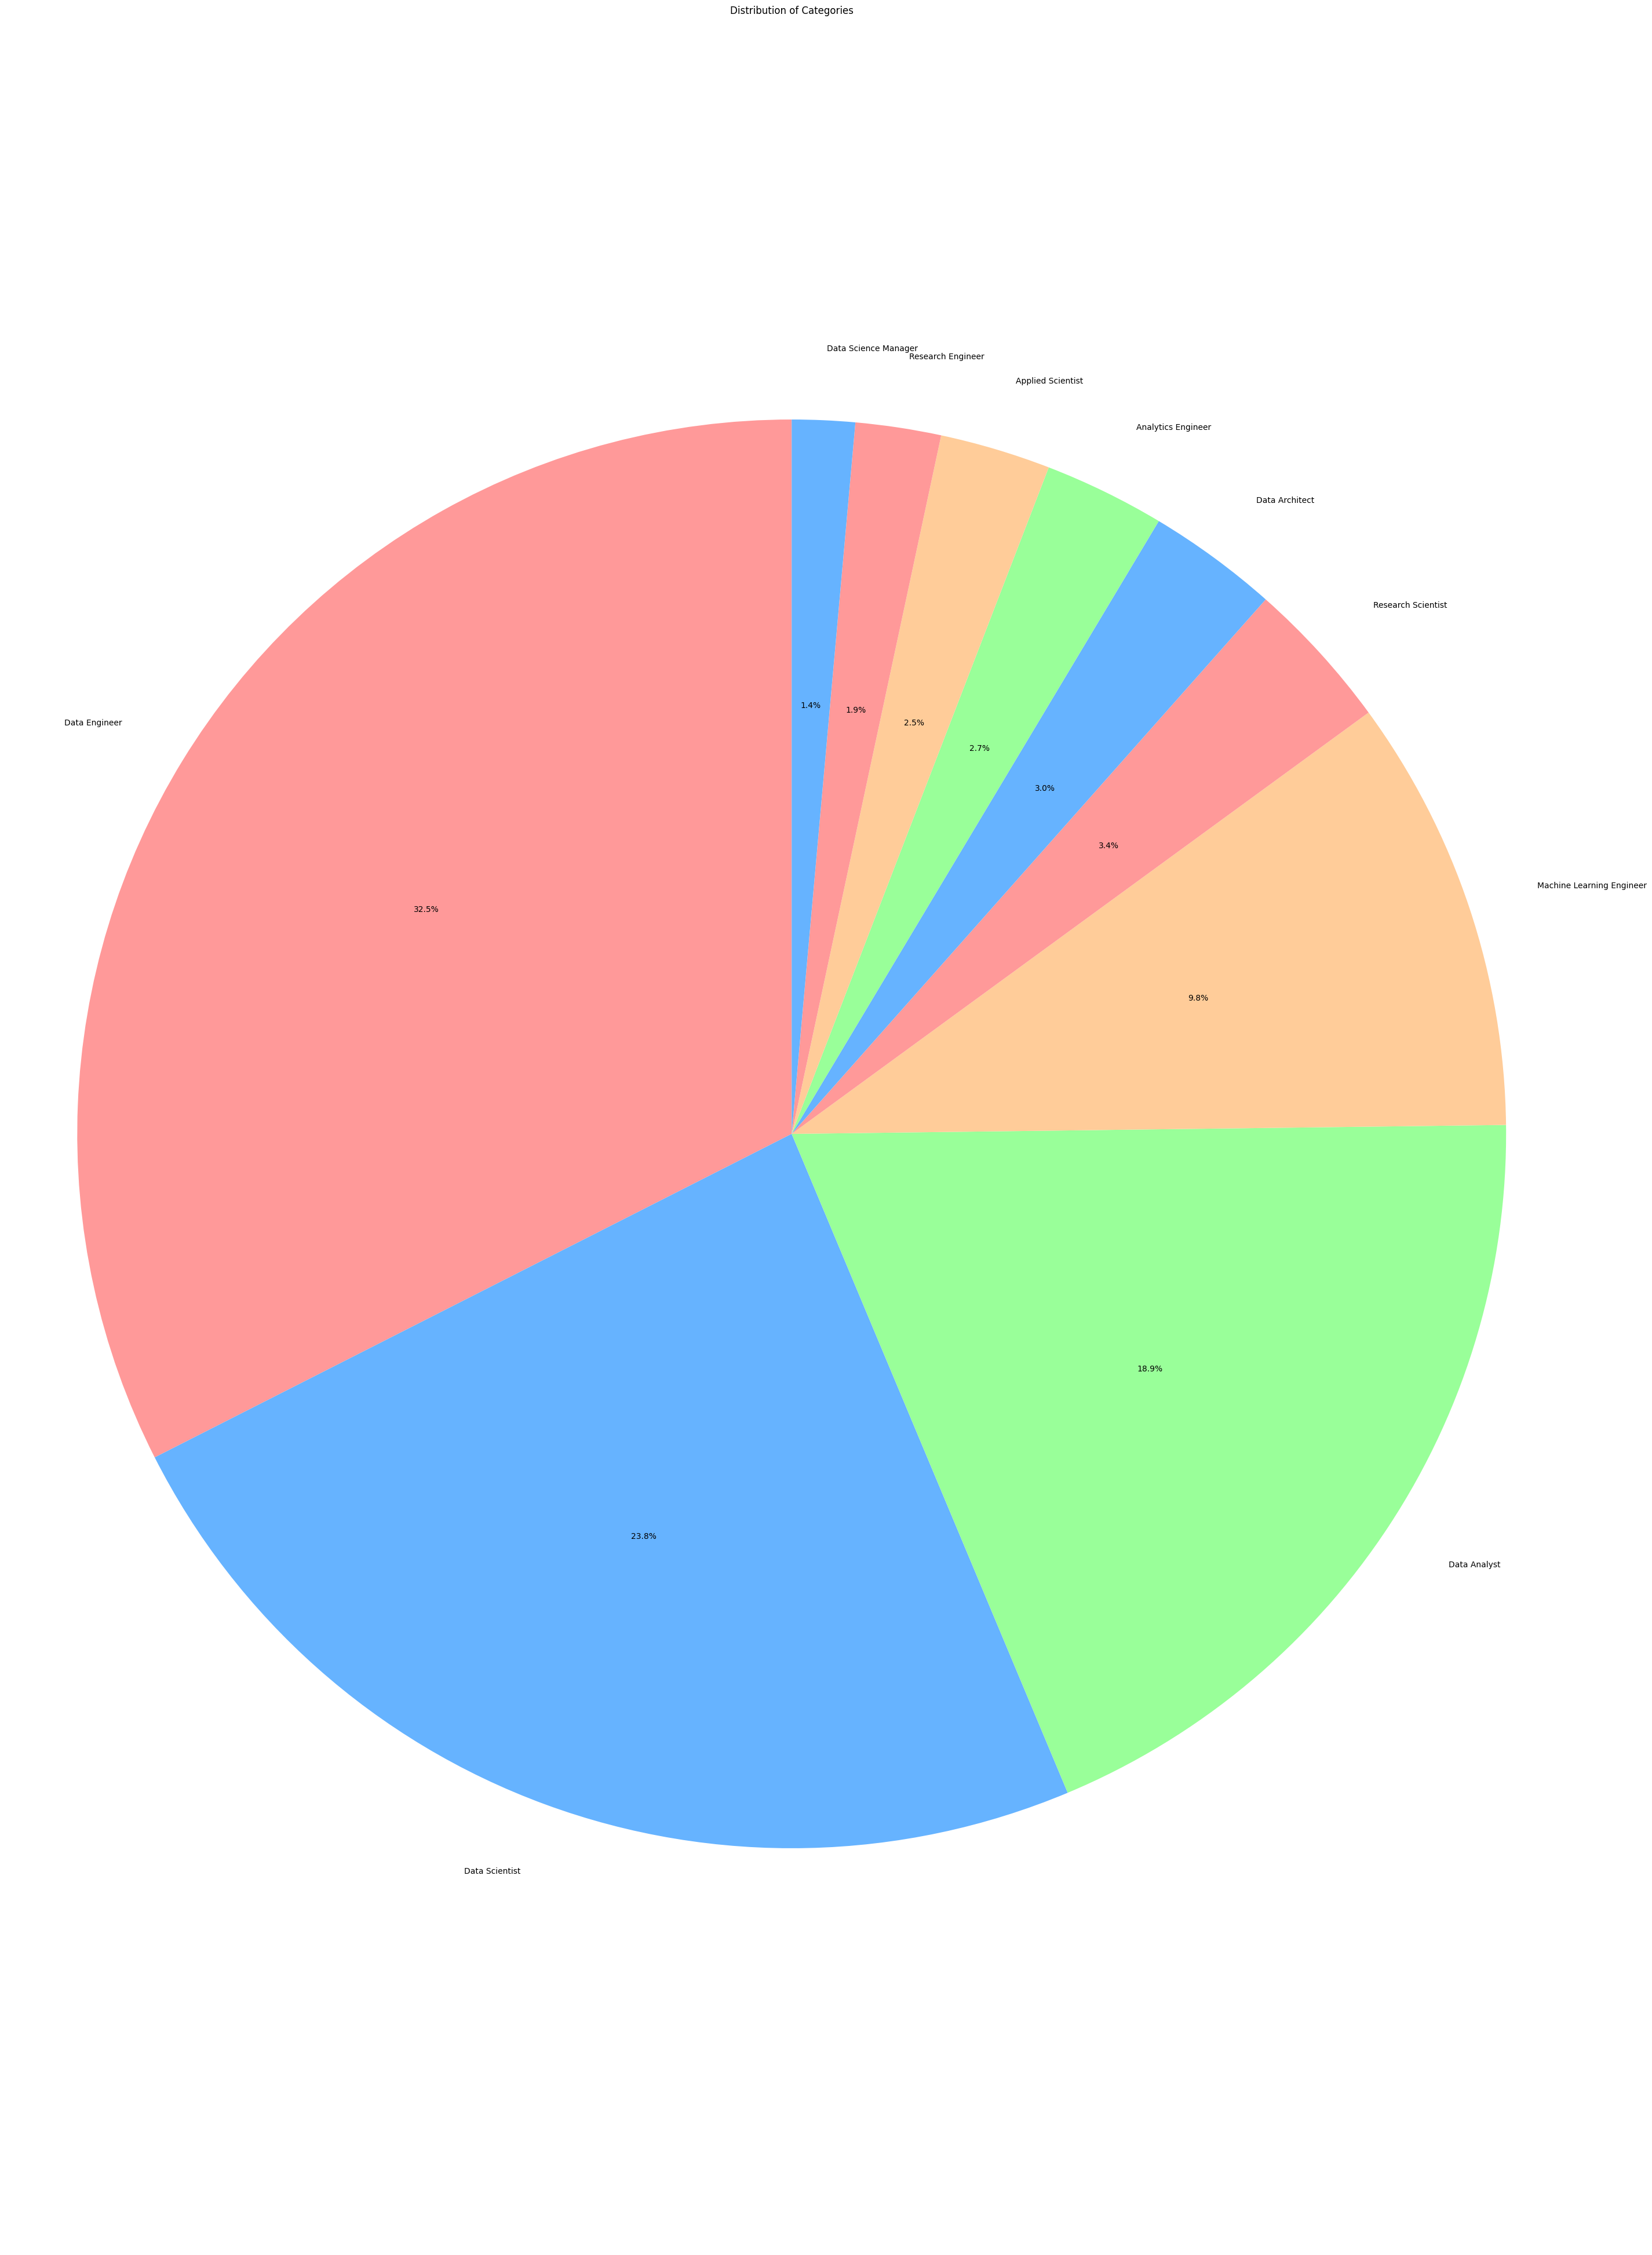

In [228]:
plt.figure(figsize=(35, 50))
plt.pie(job_capacity, labels=job_title, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.axis('equal')  
plt.title('Distribution of Categories')
plt.show()

# A heatmap to show the correlations between column

<Axes: >

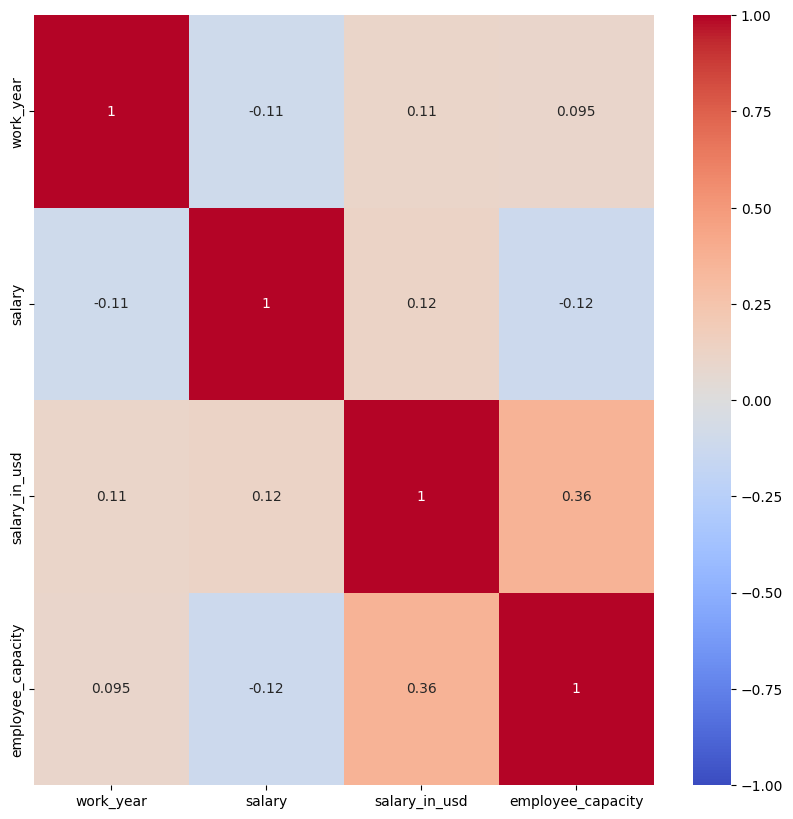

In [229]:
df_num=df[['work_year','salary','salary_in_usd','employee_capacity']]
corr = df_num.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True, cmap='coolwarm', vmin=-1, vmax=1)